In [3]:
# The K-Means Algorithm is one of the most popular unsupervised machine learning algorithms. 
# The objective of the K-Means algorithm is to minimize the intra class variance 
# We assume that the clusters are normally distributed

In [2]:
# import everything you need

import numpy as np
import matplotlib.pyplot as plt


In [151]:
# I am choosing to go with two clusters for the purposes of this example

center1 = (50, 60)
center2 = (80, 20)
distance = 20

x1 = np.random.uniform(center1[0], center1[0] + distance, size=(100,))
y1 = np.random.normal(center1[1], distance, size=(100,)) 

x2 = np.random.uniform(center2[0], center2[0] + distance, size=(100,))
y2 = np.random.normal(center2[1], distance, size=(100,)) 

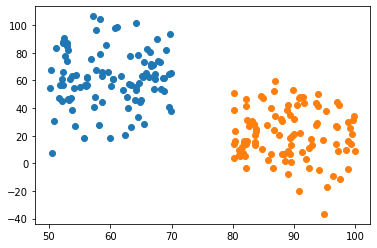

In [152]:
# The true clustering should look like this

plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.show()

In [153]:
# Modify the data into the format that we want. (ie) array([(x1,y1),(x2,y2).....])

train = np.concatenate([np.stack([x1,y1], axis=1),np.stack([x2,y2], axis=1)], axis = 0)

print(train.shape)

(200, 2)


In [154]:
# Now that we have the data we want, let us select two random points in the training set as our initial centroids
# There are several ways of deciding our first centroids but this is the one that I have chosen for this project

In [155]:
centroid1 = train[int(np.random.uniform(0,len(train)))]
centroid2 = train[int(np.random.uniform(0,len(train)))]

print(centroid1, centroid2)

[56.90506996 75.31851231] [61.05742975 98.34907886]


In [156]:
# define the get_distance function

def get_distance(a,b):
    dist = np.sum((a-b)**2)**0.5
    return dist

In [157]:
#Check the get_distance function
get_distance(centroid1,centroid2)

23.401903497114255

In [158]:
# Define the initial clusters

dist1 = np.sum((centroid1 - train)**2, axis = 1)**0.5
dist2 = np.sum((centroid2 - train)**2, axis = 1)**0.5

clusters = np.where(dist1<=dist2, 0,1)


In [159]:
print(clusters)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [160]:
# Perform Lloyd's algorithms

max_iters = 100

cluster1_ids = np.where(clusters == 0)[0]

#print(np.mean(train[cluster1_ids], axis = 0))

for it in range(max_iters):
    #print(clusters)
    cluster1_ids = np.where(clusters == 0)[0]
    cluster2_ids = np.where(clusters == 1)[0]
    centroid1 = np.mean(train[cluster1_ids], axis = 0)
    centroid2 = np.mean(train[cluster2_ids], axis = 0)
    dist1 = np.sum((centroid1 - train)**2, axis = 1)**0.5
    dist2 = np.sum((centroid2 - train)**2, axis = 1)**0.5

    new_clusters = np.where(dist1<=dist2, 0,1)
    #print(new_clusters)
    
    loss = np.var(train[np.where(new_clusters==0)])/2 + np.var(train[np.where(new_clusters==1)])/2
    
    
    if np.array_equal(clusters,new_clusters):
        break
    else:
        clusters = new_clusters
    

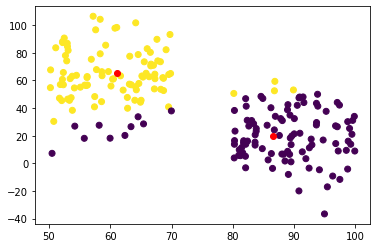

In [161]:
plt.scatter(train[:,0], train[:,1], c=clusters, cmap='viridis')
plt.scatter(centroid1[0],centroid1[1],color = 'red')
plt.scatter(centroid2[0],centroid2[1],color = 'red')